In [22]:
import pandas as pd
import plotly.express as px
import numpy as np
from tqdm import tqdm
import plotly.graph_objs as go

In [23]:
BZR_g = pd.read_csv("./greedy_method/BZR.csv")
MUTAG_g = pd.read_csv("./greedy_method/MUTAG.csv")
IMDB_g = pd.read_csv("./greedy_method/IMDB.csv")
NCI1_g = pd.read_csv("./greedy_method/NCI1.csv")
PROTEINS_g = pd.read_csv("./greedy_method/PROTEINS.csv")

BZR_f = pd.read_csv("./fast_method/BZR.csv")
MUTAG_f = pd.read_csv("./fast_method/MUTAG.csv")
IMDB_f = pd.read_csv("./fast_method/IMDB.csv")
NCI1_f = pd.read_csv("./fast_method/NCI1.csv")
PROTEINS_f = pd.read_csv("./fast_method/PROTEINS.csv")

NCI1_u = pd.read_csv("./unsupervised_method/NCI1.csv")
BZR_u = pd.read_csv("./unsupervised_method/BZR.csv")
MUTAG_u = pd.read_csv("./unsupervised_method/MUTAG.csv")
IMDB_u = pd.read_csv("./unsupervised_method/IMDB.csv")
PROTEINS_u = pd.read_csv("./unsupervised_method/PROTEINS.csv")

NCI1_r = pd.read_csv("./random_method/NCI1.csv")

NCI1_w = pd.read_csv("./worst_method/NCI1.csv")

In [24]:
BZR_g.head(3)

,selected_features,accuracy_contribution,accuracy_contribution_std
0,feat_page_rank_0,0.787623,0.040407
1,feat_selfwalk_1,0.787541,0.042916
2,feat_lsme_3,0.789426,0.032903


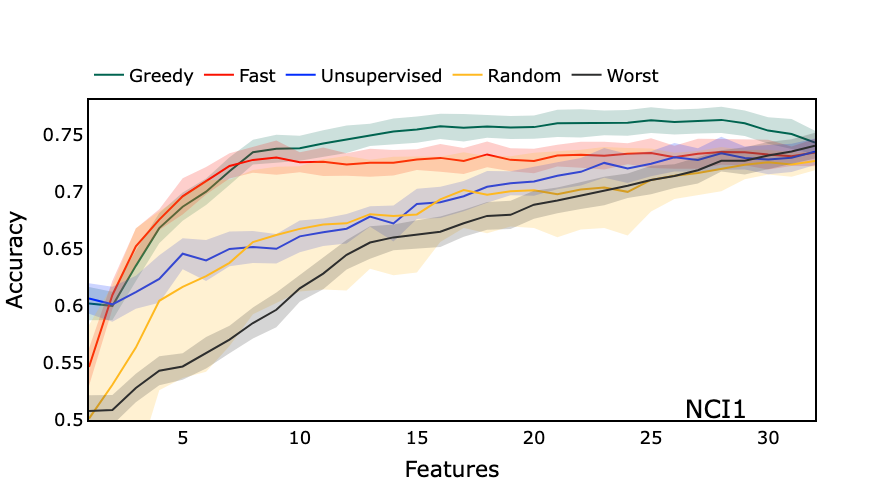

In [36]:

NCI1_g["y_upper"] = NCI1_g["accuracy_contribution"] + NCI1_g["accuracy_contribution_std"]
NCI1_g["y_lower"] = NCI1_g["accuracy_contribution"] - NCI1_g["accuracy_contribution_std"]

NCI1_f["y_upper"] = NCI1_f["accuracy_contribution"] + NCI1_f["accuracy_contribution_std"]
NCI1_f["y_lower"] = NCI1_f["accuracy_contribution"] - NCI1_f["accuracy_contribution_std"]

NCI1_u["y_upper"] = NCI1_u["accuracy_contribution"] + NCI1_u["accuracy_contribution_std"]
NCI1_u["y_lower"] = NCI1_u["accuracy_contribution"] - NCI1_u["accuracy_contribution_std"]

NCI1_r["y_upper"] = NCI1_r["accuracy_contribution"] + NCI1_r["accuracy_contribution_std"]
NCI1_r["y_lower"] = NCI1_r["accuracy_contribution"] - NCI1_r["accuracy_contribution_std"]

NCI1_w["y_upper"] = NCI1_w["accuracy_contribution"] + NCI1_w["accuracy_contribution_std"]
NCI1_w["y_lower"] = NCI1_w["accuracy_contribution"] - NCI1_w["accuracy_contribution_std"]


x_g = [i+1 for i in NCI1_g.index.tolist()]
y_g = NCI1_g["accuracy_contribution"].tolist()
y_upper_g = NCI1_g["y_upper"].tolist()
y_lower_g = NCI1_g["y_lower"].tolist()

x_f = [i+1 for i in NCI1_f.index.tolist()]
y_f = NCI1_f["accuracy_contribution"].tolist()
y_upper_f = NCI1_f["y_upper"].tolist()
y_lower_f = NCI1_f["y_lower"].tolist()

x_u = [i+1 for i in NCI1_u.index.tolist()]
y_u = NCI1_u["accuracy_contribution"].tolist()
y_upper_u = NCI1_u["y_upper"].tolist()
y_lower_u = NCI1_u["y_lower"].tolist()

x_r = [i+1 for i in NCI1_r.index.tolist()]
y_r = NCI1_r["accuracy_contribution"].tolist()
y_upper_r = NCI1_r["y_upper"].tolist()
y_lower_r = NCI1_r["y_lower"].tolist()

x_w = [i+1 for i in NCI1_w.index.tolist()]
y_w = NCI1_w["accuracy_contribution"].tolist()
y_upper_w = NCI1_w["y_upper"].tolist()
y_lower_w = NCI1_w["y_lower"].tolist()

fig = go.Figure([
    go.Scatter(
        x=x_g,
        y=y_g,
        line=dict(color='rgb(0,100,80)'),
        mode='lines',
        name="Greedy"
    ),
    go.Scatter(
        x=x_g+x_g[::-1], # x, then x reversed
        y=y_upper_g+y_lower_g[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    ),

    go.Scatter(
        x=x_f,
        y=y_f,
        line=dict(color='rgb(250, 17, 0)'),
        mode='lines',
        name="Fast"
    ),
    go.Scatter(
        x=x_f+x_f[::-1], # x, then x reversed
        y=y_upper_f+y_lower_f[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(250, 17, 0,0.2)',
        line=dict(color='rgba(235, 37, 23,0)'),
        hoverinfo="skip",
        showlegend=False
    ),

    go.Scatter(
        x=x_u,
        y=y_u,
        line=dict(color='rgb(3, 44, 252)'),
        mode='lines',
        name="Unsupervised"
    ),
    go.Scatter(
        x=x_u+x_u[::-1], # x, then x reversed
        y=y_upper_u+y_lower_u[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(3, 44, 252,0.2)',
        line=dict(color='rgba(3, 44, 252,0)'),
        hoverinfo="skip",
        showlegend=False
    ),
    go.Scatter(
        x=x_r,
        y=y_r,
        line=dict(color='rgb(255, 185, 33)'),
        mode='lines',
        name="Random"
    ),
    go.Scatter(
        x=x_r+x_r[::-1], # x, then x reversed
        y=y_upper_r+y_lower_r[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(255, 185, 33,0.2)',
        line=dict(color='rgba(255, 185, 33,0)'),
        hoverinfo="skip",
        showlegend=False
    ),
    go.Scatter(
        x=x_w,
        y=y_w,
        line=dict(color='rgb(45, 46, 46)'),
        mode='lines',
        name="Worst"
    ),
    go.Scatter(
        x=x_w+x_w[::-1], # x, then x reversed
        y=y_upper_w+y_lower_w[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(45, 46, 46,0.2)',
        line=dict(color='rgba(45, 46, 46,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])



# Update figure layout
fig.update_layout(title={'text':'NCI1', 'y':0.2, 'x':0.8,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Features",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=600,
    height=500,
    font=dict(
    size=18,
    color="black")  
)
fig.update_layout(showlegend=True)
fig.update_layout(yaxis_range=[0.5,0.78])
fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.0, opacity=1.0)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="left",
    x=0.0
))


fig.show()

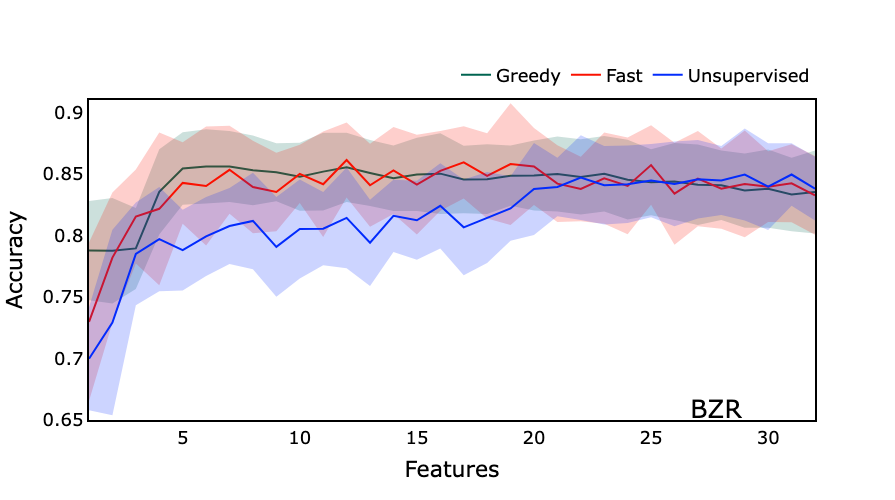

In [26]:

BZR_g["y_upper"] = BZR_g["accuracy_contribution"] + BZR_g["accuracy_contribution_std"]
BZR_g["y_lower"] = BZR_g["accuracy_contribution"] - BZR_g["accuracy_contribution_std"]

BZR_f["y_upper"] = BZR_f["accuracy_contribution"] + BZR_f["accuracy_contribution_std"]
BZR_f["y_lower"] = BZR_f["accuracy_contribution"] - BZR_f["accuracy_contribution_std"]

BZR_u["y_upper"] = BZR_u["accuracy_contribution"] + BZR_u["accuracy_contribution_std"]
BZR_u["y_lower"] = BZR_u["accuracy_contribution"] - BZR_u["accuracy_contribution_std"]

x_g = [i+1 for i in BZR_g.index.tolist()]
y_g = BZR_g["accuracy_contribution"].tolist()
y_upper_g = BZR_g["y_upper"].tolist()
y_lower_g = BZR_g["y_lower"].tolist()

x_f = [i+1 for i in BZR_f.index.tolist()]
y_f = BZR_f["accuracy_contribution"].tolist()
y_upper_f = BZR_f["y_upper"].tolist()
y_lower_f = BZR_f["y_lower"].tolist()

x_u = [i+1 for i in BZR_u.index.tolist()]
y_u = BZR_u["accuracy_contribution"].tolist()
y_upper_u = BZR_u["y_upper"].tolist()
y_lower_u = BZR_u["y_lower"].tolist()


fig = go.Figure([
    go.Scatter(
        x=x_g,
        y=y_g,
        line=dict(color='rgb(0,100,80)'),
        mode='lines',
        name="Greedy"
    ),
    go.Scatter(
        x=x_g+x_g[::-1], # x, then x reversed
        y=y_upper_g+y_lower_g[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    ),

    go.Scatter(
        x=x_f,
        y=y_f,
        line=dict(color='rgb(250, 17, 0)'),
        mode='lines',
        name="Fast"
    ),
    go.Scatter(
        x=x_f+x_f[::-1], # x, then x reversed
        y=y_upper_f+y_lower_f[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(250, 17, 0,0.2)',
        line=dict(color='rgba(235, 37, 23,0)'),
        hoverinfo="skip",
        showlegend=False
    ),

    go.Scatter(
        x=x_u,
        y=y_u,
        line=dict(color='rgb(3, 44, 252)'),
        mode='lines',
        name="Unsupervised"
    ),
    go.Scatter(
        x=x_u+x_u[::-1], # x, then x reversed
        y=y_upper_u+y_lower_u[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(3, 44, 252,0.2)',
        line=dict(color='rgba(3, 44, 252,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])


# Update figure layout
fig.update_layout(title={'text':'BZR', 'y':0.2, 'x':0.8,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Features",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2
    ),
    width=600,
    height=500,
    font=dict(
    size=18,
    color="black")  
)
fig.update_layout(showlegend=True)
fig.update_layout(yaxis_range=[0.65,0.91])
fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.0, opacity=1.0)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()

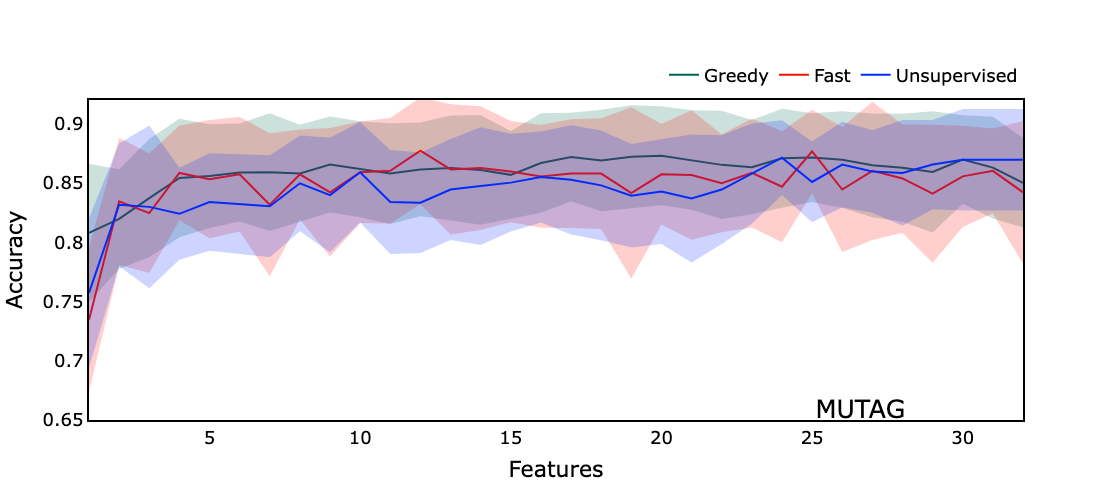

In [14]:

MUTAG_g["y_upper"] = MUTAG_g["accuracy_contribution"] + MUTAG_g["accuracy_contribution_std"]
MUTAG_g["y_lower"] = MUTAG_g["accuracy_contribution"] - MUTAG_g["accuracy_contribution_std"]

MUTAG_f["y_upper"] = MUTAG_f["accuracy_contribution"] + MUTAG_f["accuracy_contribution_std"]
MUTAG_f["y_lower"] = MUTAG_f["accuracy_contribution"] - MUTAG_f["accuracy_contribution_std"]

MUTAG_u["y_upper"] = MUTAG_u["accuracy_contribution"] + MUTAG_u["accuracy_contribution_std"]
MUTAG_u["y_lower"] = MUTAG_u["accuracy_contribution"] - MUTAG_u["accuracy_contribution_std"]

x_g = [i+1 for i in MUTAG_g.index.tolist()]
y_g = MUTAG_g["accuracy_contribution"].tolist()
y_upper_g = MUTAG_g["y_upper"].tolist()
y_lower_g = MUTAG_g["y_lower"].tolist()

x_f = [i+1 for i in MUTAG_f.index.tolist()]
y_f = MUTAG_f["accuracy_contribution"].tolist()
y_upper_f = MUTAG_f["y_upper"].tolist()
y_lower_f = MUTAG_f["y_lower"].tolist()

x_u = [i+1 for i in MUTAG_u.index.tolist()]
y_u = MUTAG_u["accuracy_contribution"].tolist()
y_upper_u = MUTAG_u["y_upper"].tolist()
y_lower_u = MUTAG_u["y_lower"].tolist()

fig = go.Figure([
    go.Scatter(
        x=x_g,
        y=y_g,
        line=dict(color='rgb(0,100,80)'),
        mode='lines',
        name="Greedy"
    ),
    go.Scatter(
        x=x_g+x_g[::-1], # x, then x reversed
        y=y_upper_g+y_lower_g[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    ),

    go.Scatter(
        x=x_f,
        y=y_f,
        line=dict(color='rgb(250, 17, 0)'),
        mode='lines',
        name="Fast"
    ),
    go.Scatter(
        x=x_f+x_f[::-1], # x, then x reversed
        y=y_upper_f+y_lower_f[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(250, 17, 0,0.2)',
        line=dict(color='rgba(235, 37, 23,0)'),
        hoverinfo="skip",
        showlegend=False
    ),

    go.Scatter(
        x=x_u,
        y=y_u,
        line=dict(color='rgb(3, 44, 252)'),
        mode='lines',
        name="Unsupervised"
    ),
    go.Scatter(
        x=x_u+x_u[::-1], # x, then x reversed
        y=y_upper_u+y_lower_u[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(3, 44, 252,0.2)',
        line=dict(color='rgba(3, 44, 252,0.0)'),
        hoverinfo="skip",
        showlegend=False
    )
])



# Update figure layout
fig.update_layout(title={'text':'MUTAG', 'y':0.2, 'x':0.78,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Features",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=600,
    height=500,
    font=dict(
    size=18,
    color="black")  
)
fig.update_layout(showlegend=True)
fig.update_layout(yaxis_range=[0.65,0.92])
fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.0, opacity=1.0)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()

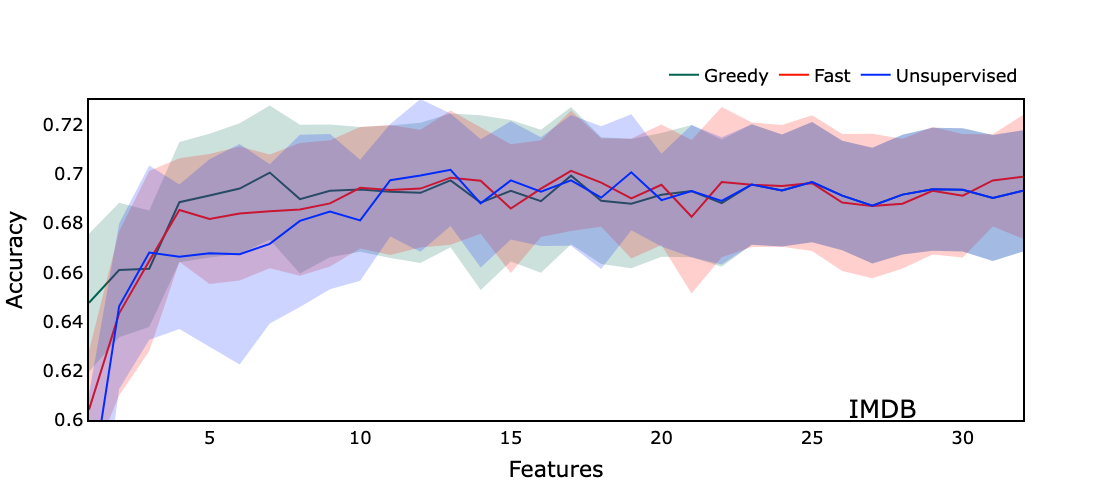

In [15]:

IMDB_g["y_upper"] = IMDB_g["accuracy_contribution"] + IMDB_g["accuracy_contribution_std"]
IMDB_g["y_lower"] = IMDB_g["accuracy_contribution"] - IMDB_g["accuracy_contribution_std"]

IMDB_f["y_upper"] = IMDB_f["accuracy_contribution"] + IMDB_f["accuracy_contribution_std"]
IMDB_f["y_lower"] = IMDB_f["accuracy_contribution"] - IMDB_f["accuracy_contribution_std"]

IMDB_u["y_upper"] = IMDB_u["accuracy_contribution"] + IMDB_u["accuracy_contribution_std"]
IMDB_u["y_lower"] = IMDB_u["accuracy_contribution"] - IMDB_u["accuracy_contribution_std"]

x_g = [i+1 for i in IMDB_g.index.tolist()]
y_g = IMDB_g["accuracy_contribution"].tolist()
y_upper_g = IMDB_g["y_upper"].tolist()
y_lower_g = IMDB_g["y_lower"].tolist()

x_f = [i+1 for i in IMDB_f.index.tolist()]
y_f = IMDB_f["accuracy_contribution"].tolist()
y_upper_f = IMDB_f["y_upper"].tolist()
y_lower_f = IMDB_f["y_lower"].tolist()

x_u = [i+1 for i in IMDB_u.index.tolist()]
y_u = IMDB_u["accuracy_contribution"].tolist()
y_upper_u = IMDB_u["y_upper"].tolist()
y_lower_u = IMDB_u["y_lower"].tolist()


fig = go.Figure([
    go.Scatter(
        x=x_g,
        y=y_g,
        line=dict(color='rgb(0,100,80)'),
        mode='lines',
        name="Greedy"
    ),
    go.Scatter(
        x=x_g+x_g[::-1], # x, then x reversed
        y=y_upper_g+y_lower_g[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    ),

    go.Scatter(
        x=x_f,
        y=y_f,
        line=dict(color='rgb(250, 17, 0)'),
        mode='lines',
        name="Fast"
    ),
    go.Scatter(
        x=x_f+x_f[::-1], # x, then x reversed
        y=y_upper_f+y_lower_f[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(250, 17, 0,0.2)',
        line=dict(color='rgba(235, 37, 23,0)'),
        hoverinfo="skip",
        showlegend=False
    ),

    go.Scatter(
        x=x_u,
        y=y_u,
        line=dict(color='rgb(3, 44, 252)'),
        mode='lines',
        name="Unsupervised"
    ),
    go.Scatter(
        x=x_u+x_u[::-1], # x, then x reversed
        y=y_upper_u+y_lower_u[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(3, 44, 252,0.2)',
        line=dict(color='rgba(3, 44, 252,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])



# Update figure layout
fig.update_layout(title={'text':'IMDB', 'y':0.2, 'x':0.8,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Features",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=600,
    height=500,
    font=dict(
    size=18,
    color="black")  
)
fig.update_layout(showlegend=True)
fig.update_layout(yaxis_range=[0.6,0.73])
fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.0, opacity=1.0)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()

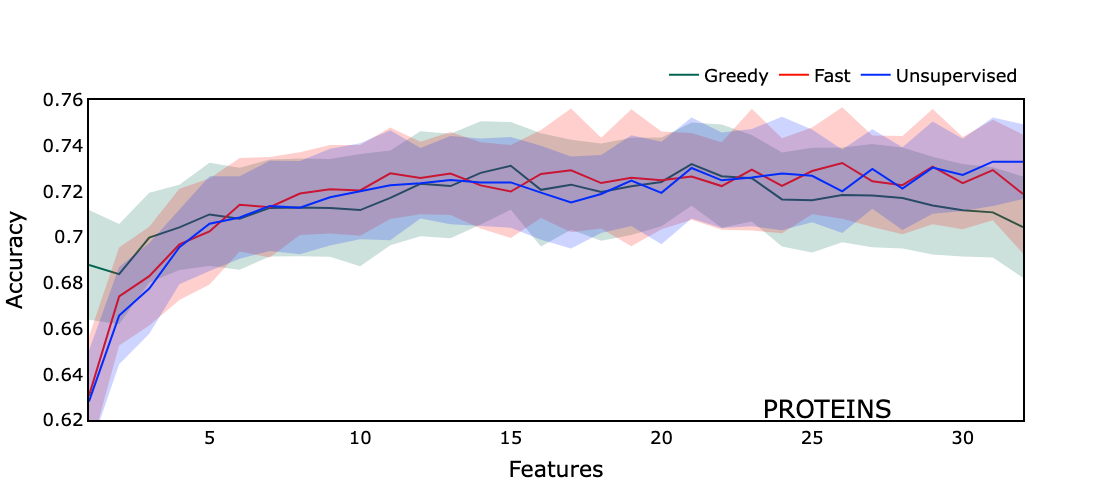

In [16]:

PROTEINS_g["y_upper"] = PROTEINS_g["accuracy_contribution"] + PROTEINS_g["accuracy_contribution_std"]
PROTEINS_g["y_lower"] = PROTEINS_g["accuracy_contribution"] - PROTEINS_g["accuracy_contribution_std"]

PROTEINS_f["y_upper"] = PROTEINS_f["accuracy_contribution"] + PROTEINS_f["accuracy_contribution_std"]
PROTEINS_f["y_lower"] = PROTEINS_f["accuracy_contribution"] - PROTEINS_f["accuracy_contribution_std"]

PROTEINS_u["y_upper"] = PROTEINS_u["accuracy_contribution"] + PROTEINS_u["accuracy_contribution_std"]
PROTEINS_u["y_lower"] = PROTEINS_u["accuracy_contribution"] - PROTEINS_u["accuracy_contribution_std"]


x_g = [i+1 for i in PROTEINS_g.index.tolist()]
y_g = PROTEINS_g["accuracy_contribution"].tolist()
y_upper_g = PROTEINS_g["y_upper"].tolist()
y_lower_g = PROTEINS_g["y_lower"].tolist()

x_f = [i+1 for i in PROTEINS_f.index.tolist()]
y_f = PROTEINS_f["accuracy_contribution"].tolist()
y_upper_f = PROTEINS_f["y_upper"].tolist()
y_lower_f = PROTEINS_f["y_lower"].tolist()

x_u = [i+1 for i in PROTEINS_u.index.tolist()]
y_u = PROTEINS_u["accuracy_contribution"].tolist()
y_upper_u = PROTEINS_u["y_upper"].tolist()
y_lower_u = PROTEINS_u["y_lower"].tolist()


fig = go.Figure([
    go.Scatter(
        x=x_g,
        y=y_g,
        line=dict(color='rgb(0,100,80)'),
        mode='lines',
        name="Greedy"
    ),
    go.Scatter(
        x=x_g+x_g[::-1], # x, then x reversed
        y=y_upper_g+y_lower_g[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    ),

    go.Scatter(
        x=x_f,
        y=y_f,
        line=dict(color='rgb(250, 17, 0)'),
        mode='lines',
        name="Fast"
    ),
    go.Scatter(
        x=x_f+x_f[::-1], # x, then x reversed
        y=y_upper_f+y_lower_f[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(250, 17, 0,0.2)',
        line=dict(color='rgba(235, 37, 23,0)'),
        hoverinfo="skip",
        showlegend=False
    ),

    go.Scatter(
        x=x_u,
        y=y_u,
        line=dict(color='rgb(3, 44, 252)'),
        mode='lines',
        name="Unsupervised"
    ),
    go.Scatter(
        x=x_u+x_u[::-1], # x, then x reversed
        y=y_upper_u+y_lower_u[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(3, 44, 252,0.2)',
        line=dict(color='rgba(3, 44, 252,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])



# Update figure layout
fig.update_layout(title={'text':'PROTEINS', 'y':0.2, 'x':0.75,'xanchor': 'center','yanchor': 'top'})
fig.update_layout(paper_bgcolor='white')
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(color='black')
fig.update_layout(
    yaxis = dict(
        title = "Accuracy",
        zeroline=True,
        showline = True,
        linecolor = 'black',
        mirror=True,
        linewidth = 2
    ),
    xaxis = dict(
        title = "Features",
        mirror=True,
        zeroline=True,
        showline = True,
        linecolor = 'black',
        linewidth = 2,
    ),
    width=600,
    height=500,
    font=dict(
    size=18,
    color="black")  
)
fig.update_layout(showlegend=True)
fig.update_layout(yaxis_range=[0.62,0.76])
fig.update_xaxes(showgrid=False, gridwidth=0.5, gridcolor='#e3e1e1')
fig.update_yaxes(showgrid=False, gridwidth=0.5, gridcolor='grey')
fig.update_traces(marker_line_color='black', marker_line_width=1.0, opacity=1.0)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))


fig.show()